<a href="https://colab.research.google.com/github/HariPrashanth2242/Chronic-Kidney-Disease-Prediction/blob/main/Chronic-Kidney-Disease-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd

In [96]:
df_data=pd.read_csv('kidney_disease.csv')

In [97]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [98]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [99]:
df_data.shape

(400, 26)

In [100]:
df_data.drop('id',axis=1,inplace=True)

In [101]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [102]:
txt_cols=['pcv','wc','rc']
for i in txt_cols:
    print(f"{i}:{df_data[i].dtype}")

pcv:object
wc:object
rc:object


In [103]:
def convert(df_data,column):
  df_data[column]=pd.to_numeric(df_data[column],errors='coerce')
for i in txt_cols:
  convert(df_data,i)
  print(f"{i}:{df_data[i].dtype}")


pcv:float64
wc:float64
rc:float64


In [104]:
missing=df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False)

,0
rbc,152
rc,131
wc,106
pot,88
sod,87
pcv,71
pc,65
hemo,52
su,49
sg,47


In [105]:
def mean_val(df_data,column):
  mean=df_data[column].mean()
  df_data[column]=df_data[column].fillna(mean)
def mode_val(df_data,column):
  mode=df_data[column].mode()[0]
  df_data[column]=df_data[column].fillna(mode)


In [106]:
mean_cols=[cols for cols in df_data if df_data[cols].dtype != 'object' ]
for i in mean_cols :
  mean_val(df_data,i)
mode_cols=[cols for cols in df_data if df_data[cols].dtype == 'object' ]
for i in mode_cols:
  mode_val(df_data,i)

In [107]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [113]:
print(df_data['htn'].unique())
print(df_data['dm'].unique())
print(df_data['cad'].unique())
print(df_data['classification'].unique())

[1 0]
[1 0]
[0 1]
[1 0]


In [109]:
df_data['dm']=df_data['dm'].replace(to_replace={" yes":"yes","\tyes":"yes","\tno":"no"})
df_data['cad']=df_data['cad'].replace(to_replace={"\tno":"no"})
df_data['classification']=df_data['classification'].replace(to_replace={"ckd\t":"ckd"})

In [111]:
df_data['classification']=df_data['classification'].map({'ckd':1,'notckd':0})
df_data['rbc']=df_data['rbc'].map({'abnormal':0,'normal':1})
df_data['pc']=df_data['pc'].map({'abnormal':0,'normal':1})
df_data['pcc']=df_data['pcc'].map({'present':1,'notpresent':0})
df_data['ba']=df_data['ba'].map({'present':1,'notpresent':0})
df_data['htn']=df_data['htn'].map({'yes':1,'no':0})
df_data['dm']=df_data['dm'].map({'yes':1,'no':0})
df_data['cad']=df_data['cad'].map({'yes':1,'no':0})
df_data['appet']=df_data['appet'].map({'good':1,'poor':0})
df_data['pe']=df_data['pe'].map({'yes':1,'no':0})
df_data['ane']=df_data['ane'].map({'yes':1,'no':0})

In [114]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns


<function matplotlib.pyplot.show(close=None, block=None)>

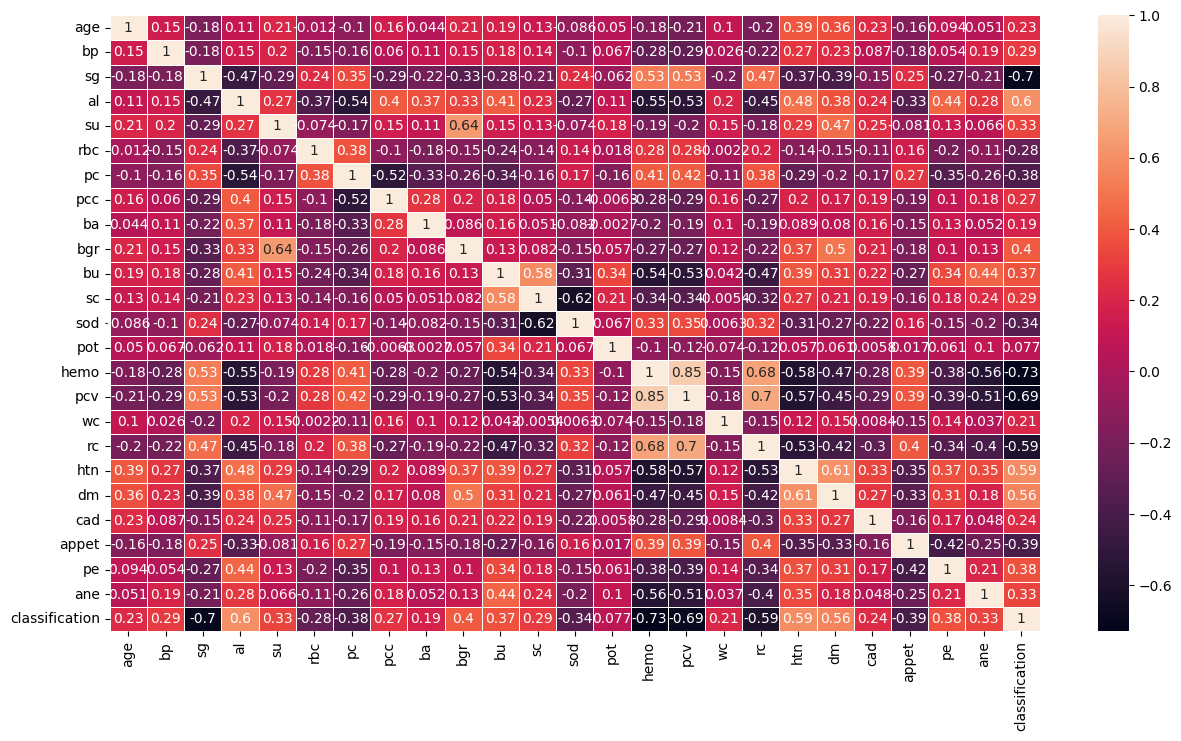

In [119]:
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(),annot=True,linewidth=0.5)
plt.show


In [122]:
target_corr=df_data.corr()['classification'].abs().sort_values(ascending=False)[1:]
target_corr


,classification
hemo,0.729628
sg,0.698957
pcv,0.690060
al,0.599238
rc,0.590913
htn,0.590438
dm,0.559060
bgr,0.401374
appet,0.393341
pc,0.375154


In [123]:
from sklearn.model_selection import train_test_split


In [128]:
x=df_data.drop('classification',axis=1)
y=df_data['classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)
print(x_train.shape)
print(x_test.shape)


(320, 24)
(80, 24)


In [129]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score


In [136]:
models=[]
models.append(('naive bayers',GaussianNB()))
models.append(('random forest',RandomForestClassifier()))
models.append(('svm',SVC(kernel='linear')))
models.append(('knn',KNeighborsClassifier(n_neighbors=8)))
models.append(('decision tree',DecisionTreeClassifier()))


In [138]:
for name,model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('\n')
  print(name)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(f1_score(y_test,y_pred))
  print(recall_score(y_test,y_pred))
  print(precision_score(y_test,y_pred))



naive bayers
0.9625
[[31  0]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.94      0.97        49

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

0.968421052631579
0.9387755102040817
1.0


random forest
0.975
[[29  2]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.96      1.00      0.98        49

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

0.98
1.0
0.9607843137254902


svm
0.925
[[28  3]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        31
           1       0.94      0.94      0.94        49

